# Applied Machine Learning 2
## Course project          
                                                 Author: Diego Rodriguez
## Logistic regression baseline

Another strong baseline to evaluate is logistic regression
- Evaluate the logistic regression baseline
- Tune its regularization strength parameter with cross-validated grid-search
- Pick ten images and compute the probability for each class using the predict_proba() function of your estimator. Plot the results for each image and comment your findings. For example, you can plot the ten images in subplots and collect the probabilities in a DataFrame.
- Finally, vary the regularization strength of your estimator. What is the effect on the probabilities? Write your observations in a markdown cell.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Load the npz file
base_dir = '/Users/rodriguezmod/Downloads/swissroads/'

with np.load(base_dir+'features.npz', allow_pickle=False) as npz_file: 
    # It's a dictionary-like object 
    print(list(npz_file.keys()))
    
    # Load the arrays    
    # Merging test and validation features data to use a cross-validation approach to model fitting.
    X_tr = np.concatenate((npz_file['train_features'], npz_file['validation_features']))
    X_tr_pixels = np.concatenate((npz_file['train_pixels'], npz_file['validation_pixels']))
    y_tr = np.concatenate((npz_file['train_labels'], npz_file['validation_labels']))
    # Reduce to 1-dim
    y_tr = np.argmax(y_tr, axis=1)

    X_te = npz_file['test_features']
    X_te_pixels = npz_file['test_pixels']
    y_te = npz_file['test_labels']
    # Reduce to 1-dim
    y_te = np.argmax(y_te, axis=1)

['train_features', 'validation_features', 'test_features', 'train_labels', 'validation_labels', 'test_labels', 'train_pixels', 'validation_pixels', 'test_pixels']


## Logreg performance
Evaluate the logistic regression baseline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create logistic regression object
logreg = LogisticRegression(multi_class='ovr', solver='liblinear')

# Create the pipeline
logreg_pipeline = Pipeline([
     ('scaler', StandardScaler()), # With standardization
     ('logreg', logreg)
])

# Fitting on train set
logreg_pipeline.fit(X_tr, y_tr)

# Evaluate on train set
accuracy_tr = logreg_pipeline.score(X_tr, y_tr)

# Evaluate on test set
accuracy_te = logreg_pipeline.score(X_te, y_te)

# Print accuracy
print('Train accuracy: {:.1f}%'.format(100*accuracy_tr))
      
# Print accuracy
print('Test accuracy: {:.1f}%'.format(100*accuracy_te))

Train accuracy: 100.0%
Test accuracy: 96.0%


## CVed grid search
Tune its regularization strength parameter with cross-validated grid-search

In [3]:
from sklearn.model_selection import GridSearchCV

# Grid search with cross-validation
Cs = np.logspace(-4, 4, num=20)
grids = [{
    'logreg__multi_class': ['ovr'],
    'logreg__solver': ['liblinear'],
    'logreg__C': Cs
}, {
    'logreg__multi_class': ['multinomial'],
    'logreg__solver': ['saga'],
    'logreg__C': Cs
}]
logreg_gscv = GridSearchCV(logreg_pipeline, grids, cv=10, refit=True, return_train_score=True, verbose=1, n_jobs=8)

In [4]:
# Import warnings, there are a lot verbosity due deprecated tensorflow modules
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Fitting on train set
logreg_gscv.fit(X_tr, y_tr)

# Collect results in a DataFrame
logreg_results = pd.DataFrame({
    'strategy': logreg_gscv.cv_results_['param_logreg__multi_class'],
    'C': logreg_gscv.cv_results_['param_logreg__C'],
    'mean_tr': logreg_gscv.cv_results_['mean_train_score'],
    'mean_te': logreg_gscv.cv_results_['mean_test_score'],
    'std_te': logreg_gscv.cv_results_['std_test_score']
})

# Ten best combinations according to the mean test score
logreg_results.sort_values(by='mean_te', ascending=False).head(10)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   52.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  2.3min finished


,strategy,C,mean_tr,mean_te,std_te
16,ovr,545.559,1.0,0.921370,0.036877
18,ovr,3792.69,1.0,0.918990,0.030383
17,ovr,1438.45,1.0,0.918990,0.030383
19,ovr,10000,1.0,0.916609,0.030471
14,ovr,78.476,1.0,0.914170,0.030348
15,ovr,206.914,1.0,0.914111,0.030414
12,ovr,11.2884,1.0,0.911789,0.030057
13,ovr,29.7635,1.0,0.911789,0.030057
38,multinomial,3792.69,1.0,0.911672,0.042703
10,ovr,1.62378,1.0,0.909408,0.031431


In [5]:
# Evaluate on train set
accuracy_tr = logreg_gscv.score(X_tr, y_tr)

# Evaluate on test set
accuracy_te = logreg_gscv.score(X_te, y_te)

# Print accuracy
print('Train accuracy: {:.1f}%'.format(100*accuracy_tr))
      
# Print accuracy
print('Test accuracy: {:.1f}%'.format(100*accuracy_te))

Train accuracy: 100.0%
Test accuracy: 96.0%


## Class probability per image
Pick ten images and compute the probability for each class using the predict_proba() function of your estimator. Plot the results for each image and comment your findings. For example, you can plot the ten images in subplots and collect the probabilities in a DataFrame.

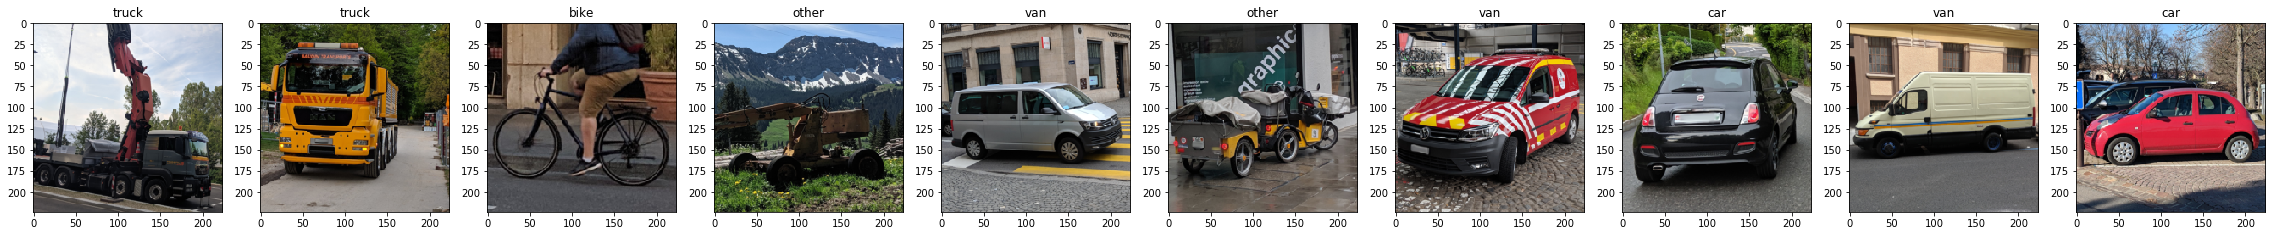

,bike,car,motorcycle,other,truck,van
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
import imageio
import numpy as np

# Container and variables definitions
category = ["bike","car","motorcycle","other","truck","van"]
results = []
start = 1

# Specifying the overall grid size
plt.figure(figsize=(40,40)) 

for i in range(0,10):
      # Predict from a selection of images
      predict = logreg_gscv.predict_proba(X_tr[[i]])
        
      # Save model and its performance on train sets
      results.append({
                'van': round(predict[0][5],2),
                'truck': round(predict[0][4],2),
                'other': round(predict[0][3],2),
                'motorcycle': round(predict[0][2],2),
                'car': round(predict[0][1],2),
                'bike': round(predict[0][0],2)
      })
      start = start + 1
    
      plt.subplot(1,10,i+1) 
      img = X_tr_pixels[i]
      title = str(category[y_tr[i]])
      plt.title(title)
      # Plot the image
      plt.imshow(img)
plt.show()

# Convert results to DataFrame
results = pd.DataFrame(results)
results.head(10)

As this can be observed both in the images and in the results table, the forecasts made with the logistic regression model with cross-validated grid-search, have a high level of accuracity. It is interesting to observe how the model can determine with up to **95%** the categories to which each image belongs, but in some cases in testing runs, the model gives for intance, high values for **"truck"** (true category) but give some probability for **"van"**, which is understandable due the shape of the two images can be confused, in the first glance. **I noticed that selection of samples changes each run the code, depend of npz file creation process.**

## Relationship between regularization strength and class probability
Finally, vary the regularization strength of your estimator. What is the effect on the probabilities? Write your observations in a markdown cell.

In [7]:
from sklearn.linear_model import LogisticRegressionCV

# Create a Logistic Regression object with cross-validation estimator
logreg_cv = LogisticRegressionCV(
       Cs=[0.1, 1, 100], cv=6, multi_class='ovr', solver='liblinear')

In [8]:
from sklearn.preprocessing import scale

# Fit the estimator
logreg_cv.fit(scale(X_tr), y_tr);

/Users/rodriguezmod/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/rodriguezmod/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [9]:
# Evaluate on train set
accuracy_tr = logreg_cv.score(X_tr, y_tr)

# Evaluate on test set
accuracy_te = logreg_cv.score(X_te, y_te)

# Print accuracy
print('Train accuracy: {:.1f}%'.format(100*accuracy_tr))
      
# Print accuracy
print('Test accuracy: {:.1f}%'.format(100*accuracy_te))

Train accuracy: 97.4%
Test accuracy: 94.0%


After fitting a the logistic regression baseline model an accuracy value of **96.0%** is obtained, which is really a very good value. Logistic regression model with cross-validation estimator, an accuracy value of **96.0%** is obtained. 
Finally, vary the regularization strength of a LogisticRegressionCV object get a value of accuracy of **94.0%** getting the same value as the logistic regression model with cross-validation estimator. this meaning that both processes are equivalent.